In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
stock = pd.read_csv('Foreign_Exchange_Rates.csv')
stock

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5212,5212,2019-12-25,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
5213,5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.788,...,1.354,6.7295,109.67,4.1337,8.8799,9.4108,181.3,0.9808,30.11,30.15
5214,5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,...,1.352,6.6829,109.47,4.126,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,5215,2019-12-30,1.4278,0.8915,1.4846,0.761,4.0152,1.3058,6.9864,7.7857,...,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.6,0.9677,30.04,29.94


In [129]:
stock[stock['EURO AREA - EURO/US$'] == '0.9847']

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97


In [130]:
stock = stock[['Time Serie','EURO AREA - EURO/US$']]
stock.columns = ['Date','Exchange']

In [131]:
stock['Date'] = pd.to_datetime(stock['Date'])

/tmp/ipykernel_28574/688752022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['Date'] = pd.to_datetime(stock['Date'])


In [132]:
stock.isna().sum()

Date        0
Exchange    0
dtype: int64

In [133]:
stock.set_index(stock['Date'],inplace=True)

In [134]:
stock.drop('Date',axis=1,inplace=True)

/tmp/ipykernel_28574/3695088863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock.drop('Date',axis=1,inplace=True)


In [135]:
def conv(x):
    try:
        x = float(x)
    except:
        x = 0
    return x

In [136]:
stock['Exchange'] = stock['Exchange'].apply(conv)

/tmp/ipykernel_28574/127846312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['Exchange'] = stock['Exchange'].apply(conv)


In [137]:
stock

,Exchange
Date,
2000-01-03,0.9847
2000-01-04,0.9700
2000-01-05,0.9676
2000-01-06,0.9686
2000-01-07,0.9714
...,...
2019-12-25,0.0000
2019-12-26,0.9007
2019-12-27,0.8949


In [138]:
stock = stock[stock['Exchange'] != 0]

In [139]:
stock.head(5)

,Exchange
Date,
2000-01-03,0.9847
2000-01-04,0.9700
2000-01-05,0.9676
2000-01-06,0.9686
2000-01-07,0.9714


<Axes: xlabel='Date'>

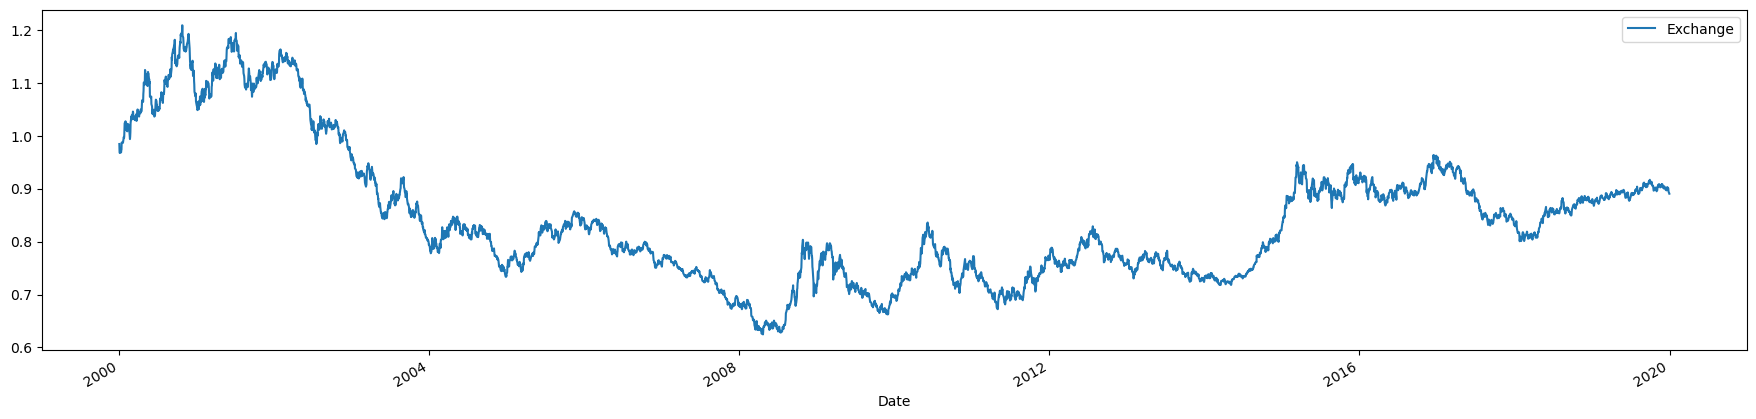

In [140]:

stock.plot(figsize=(22,5))

In [141]:
stock3 = stock.copy(deep=True)

In [142]:
stock['RollMean'] = stock['Exchange'].rolling(window=10).mean()
stock['RollSTD'] = stock['Exchange'].rolling(window=10).std()

/tmp/ipykernel_28574/4164250607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['RollMean'] = stock['Exchange'].rolling(window=10).mean()
/tmp/ipykernel_28574/4164250607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['RollSTD'] = stock['Exchange'].rolling(window=10).std()


In [143]:
stock

,Exchange,RollMean,RollSTD
Date,,,
2000-01-03,0.9847,NaN,NaN
2000-01-04,0.9700,NaN,NaN
2000-01-05,0.9676,NaN,NaN
2000-01-06,0.9686,NaN,NaN
2000-01-07,0.9714,NaN,NaN
...,...,...,...
2019-12-24,0.9022,0.89997,0.002019
2019-12-26,0.9007,0.89988,0.001958
2019-12-27,0.8949,0.89940,0.002516


<Axes: xlabel='Date'>

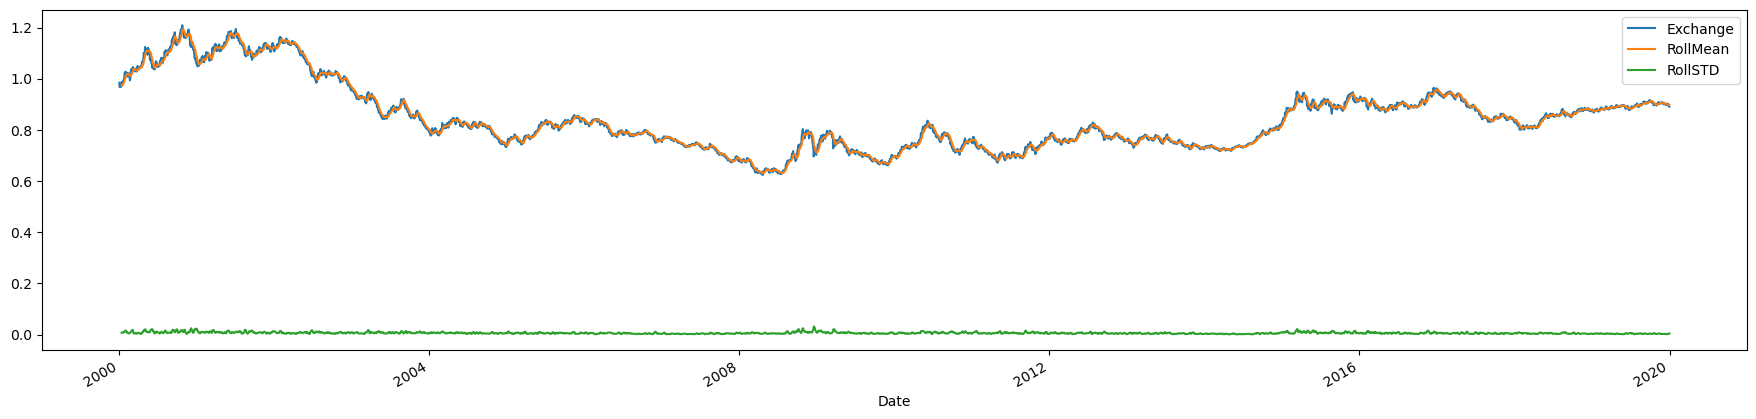

In [144]:
stock.plot(figsize=(22,5))

In [145]:
adfuller(stock['Exchange'])


(-1.6121642378208618,
 0.4768396031149325,
 5,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 -38309.6283998119)

In [146]:
# test_stat > crit val and p-value is greater than 0.05 so data is not stationary

In [147]:
stock['RollDiff'] = stock['Exchange'] - stock['Exchange'].shift(1)

/tmp/ipykernel_28574/386658338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['RollDiff'] = stock['Exchange'] - stock['Exchange'].shift(1)


<Axes: xlabel='Date'>

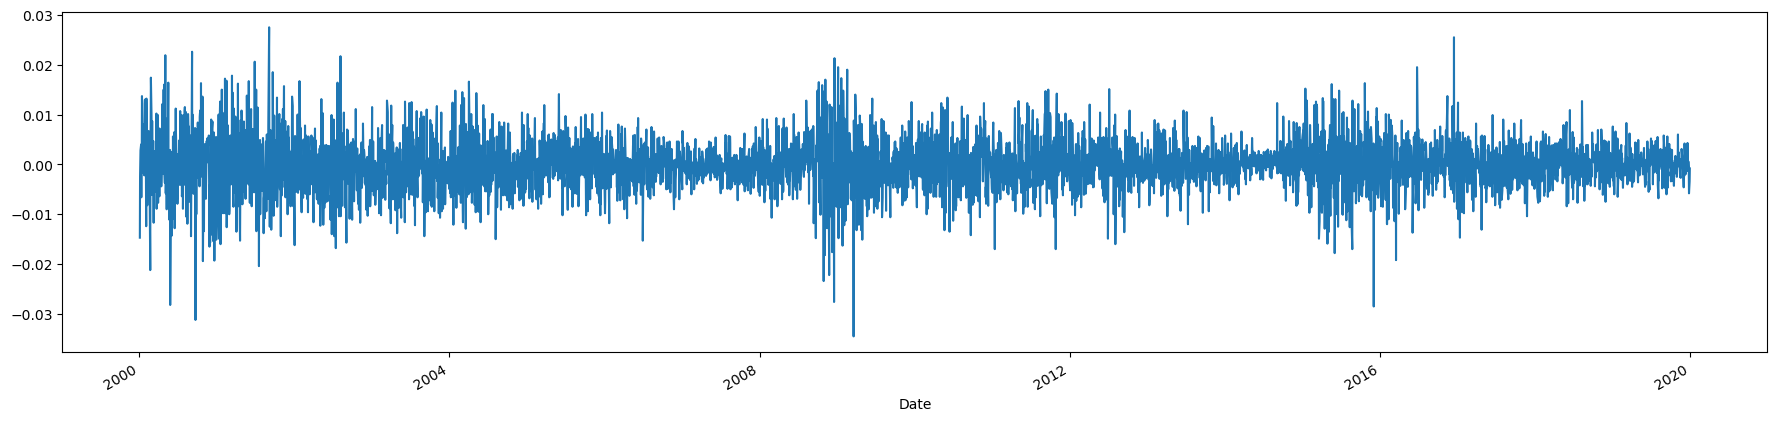

In [148]:
stock['RollDiff'].plot(figsize=(22,5))

In [149]:
stock1 = stock

In [150]:
stock1.dropna(inplace=True)

/tmp/ipykernel_28574/1956316720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock1.dropna(inplace=True)


In [151]:
stock1['RollMean1'] = stock1['RollDiff'].rolling(window=10).mean()
stock1['RollSTD1'] = stock1['RollDiff'].rolling(window=10).std()

/tmp/ipykernel_28574/1796681676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock1['RollMean1'] = stock1['RollDiff'].rolling(window=10).mean()
/tmp/ipykernel_28574/1796681676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock1['RollSTD1'] = stock1['RollDiff'].rolling(window=10).std()


In [152]:
stock1.drop(['Exchange','RollMean','RollSTD'],axis=1,inplace=True)

/tmp/ipykernel_28574/1640850576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock1.drop(['Exchange','RollMean','RollSTD'],axis=1,inplace=True)


In [153]:
stock1

,RollDiff,RollMean1,RollSTD1
Date,,,
2000-01-14,0.0137,NaN,NaN
2000-01-18,0.0006,NaN,NaN
2000-01-19,0.0006,NaN,NaN
2000-01-20,-0.0017,NaN,NaN
2000-01-21,0.0032,NaN,NaN
...,...,...,...
2019-12-24,0.0006,0.00005,0.001998
2019-12-26,-0.0015,-0.00009,0.002058
2019-12-27,-0.0058,-0.00048,0.002706


<Axes: xlabel='Date'>

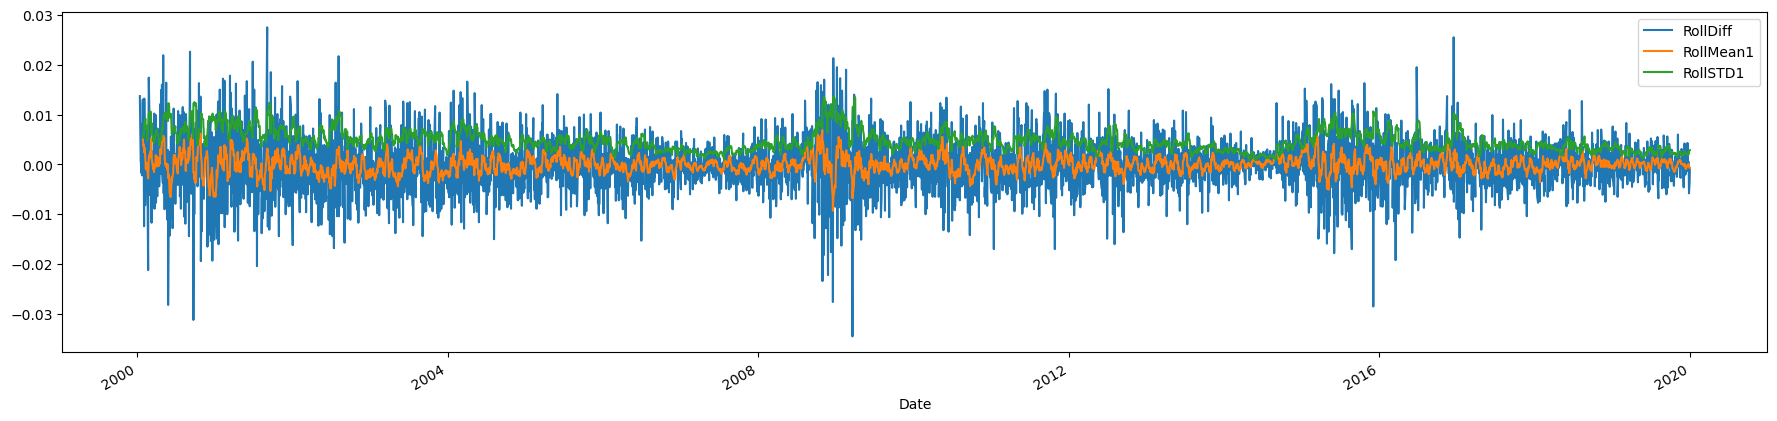

In [154]:
stock1.plot(figsize=(22,5))

In [155]:
adfuller(stock1['RollDiff'])

(-31.934490147391912,
 0.0,
 4,
 5005,
 {'1%': -3.4316572241792462,
  '5%': -2.862117651858631,
  '10%': -2.567077484762989},
 -38269.48489293144)

In [156]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

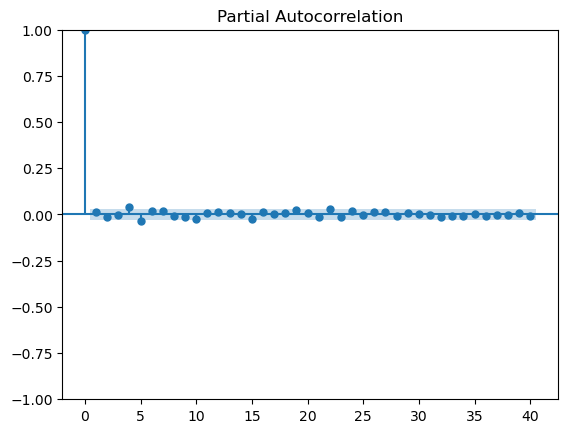

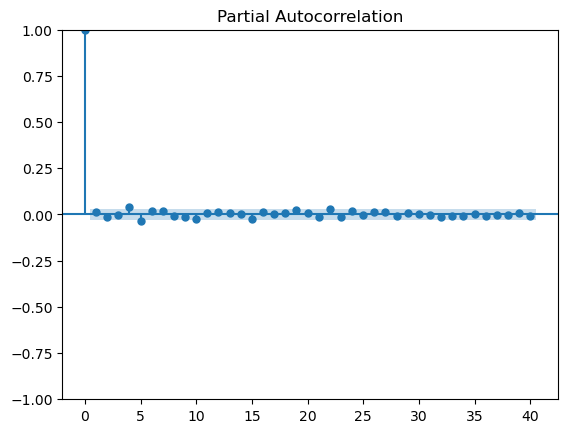

In [166]:
plot_pacf(stock1['RollDiff'],lags=40)

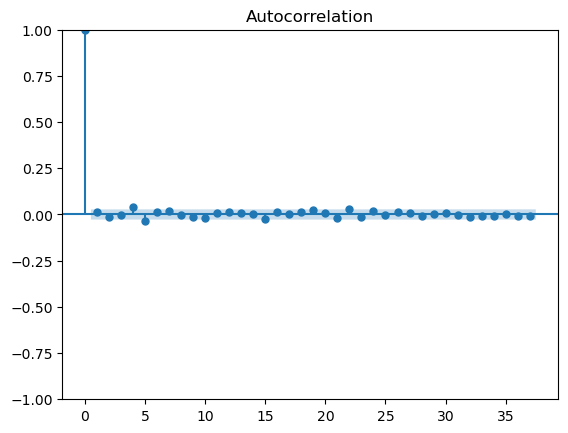

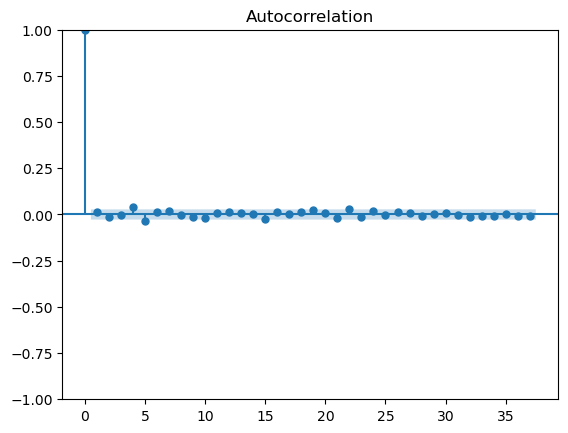

In [158]:
plot_acf(stock1['RollDiff'])

p = AutoCorr    = 4
d = lags        = 5
q = ParAutoCorr = 1

In [159]:
from statsmodels.tsa.arima.model import ARIMA

In [160]:
import itertools
import statsmodels.api as sm
p=d=q=range(5)

pdq = list(itertools.product(p,d,q))
lst = {}
for param in pdq:
    try:
        model_arima = ARIMA(stock1['RollDiff'],order=param)
        model_arima_fit = model_arima.fit()
        lst[param] = model_arima_fit.aic
    except:
        continue
x = 0
pdq = 0
for k in lst.keys():
    if x > lst[k]:
        x = lst[k]
        pdq = k

/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasti

In [161]:
pdq

(1, 0, 4)

In [162]:
p = 0
d = 0
q = 4

In [163]:
model = ARIMA(stock1['RollDiff'],order=(p,d,q))
result = model.fit() 

/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [164]:
stock3

,Exchange
Date,
2000-01-03,0.9847
2000-01-04,0.9700
2000-01-05,0.9676
2000-01-06,0.9686
2000-01-07,0.9714
...,...
2019-12-24,0.9022
2019-12-26,0.9007
2019-12-27,0.8949


/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/dai/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


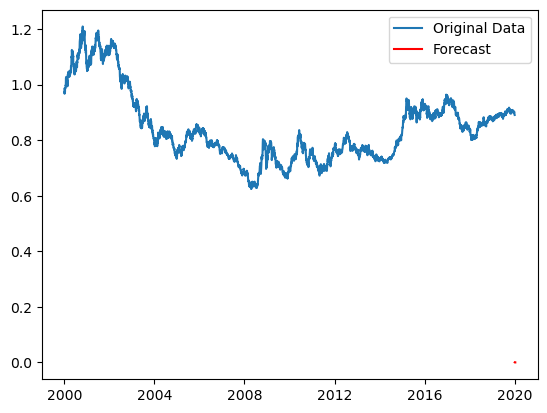

In [165]:
# Generate forecasts with the ARIMA model:
forecast_steps = 10  # Number of time steps to forecast

forecast = result.get_forecast(steps=forecast_steps)

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_stderr = forecast.se_mean
forecast_conf_int = forecast.conf_int()

# Plot the original data and the forecasted values
plt.plot(stock3['Exchange'], label='Original Data')
forecast_index = pd.date_range(start=stock3.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.legend()
plt.show()
